# Bias-Variance Trade-Off - Lab

## Introduction

In this lab, you'll practice your knowledge on the bias-variance trade-off!

## Objectives

You will be able to: 
- Look at an example where Polynomial regression leads to overfitting
- Understand how bias-variance trade-off relates to underfitting and overfitting

## Let's get started!

In this lab, you'll try to predict some movie revenues based on certain factors, such as ratings and movie year.

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

df = pd.read_excel('./movie_data_detailed_with_ols.xlsx')
df.head()

,Unnamed: 0,budget,domgross,title,Response_Json,Year,imdbRating,Metascore,imdbVotes,Model
0,0,13000000,25682380,21 &amp; Over,0,2008,6.8,48,206513,4.912759e+07
1,1,45658735,13414714,Dredd 3D,0,2012,0.0,0,0,2.267265e+05
2,2,20000000,53107035,12 Years a Slave,0,2013,8.1,96,537525,1.626624e+08
3,3,61000000,75612460,2 Guns,0,2013,6.7,55,173726,7.723381e+07
4,4,40000000,95020213,42,0,2013,7.5,62,74170,4.151958e+07


In [2]:
# Only keep four predictors and transform them with MinMaxScaler

scale = MinMaxScaler()
df = df[[ "domgross", "budget", "imdbRating", "Metascore", "imdbVotes"]]
transformed = scale.fit_transform(df)
pd_df = pd.DataFrame(transformed, columns = df.columns)
pd_df.head()

,domgross,budget,imdbRating,Metascore,imdbVotes
0,0.055325,0.034169,0.839506,0.500000,0.384192
1,0.023779,0.182956,0.000000,0.000000,0.000000
2,0.125847,0.066059,1.000000,1.000000,1.000000
3,0.183719,0.252847,0.827160,0.572917,0.323196
4,0.233625,0.157175,0.925926,0.645833,0.137984


## Split the data into a test and train set

In [11]:
# domgross is the outcome variable
x = pd_df[['budget', 'imdbRating', 'Metascore', 'imdbVotes']]
y = pd_df['domgross']

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y)

## Fit a regression model to the training data and look at the coefficients

In [16]:
# Your code 
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(x_train, y_train)
linreg.coef_

array([ 0.45894154, -0.21818578,  0.22397325,  0.35815637])

## Plot the training predictions against the actual data (y_hat_train vs. y_train)

Let's plot our result for the train data. Because we have multiple predictors, we can not simply plot the income variable X on the x-axis and target y on the y-axis. Lets plot 
- A line showing the diagonal of y_train. The actual y_train values are on this line
- Next, make a scatter plot that takes the actual y_train on the x-axis and the predictions using the model on the y-axis. You will see points scattered around the line. The vertical distances between the points and the lines are the errors.

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

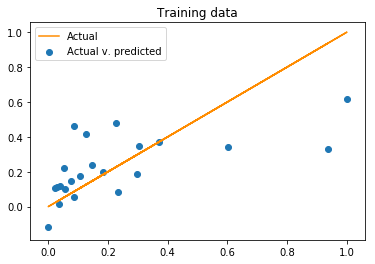

In [21]:
y_hat_train = linreg.predict(x_train)

plt.plot(y_train, y_train, label='Actual', color='darkorange')
plt.scatter(y_train, y_hat_train, label='Actual v. predicted')
plt.legend()
plt.title('Training data')
plt.show();

## Plot the test predictions against the actual data (y_hat_test vs. y_test)

Do the same thing for the test data.

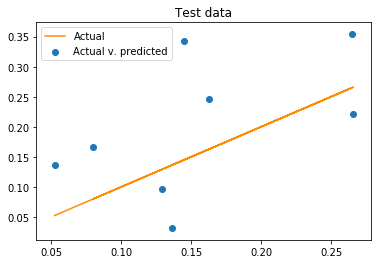

In [23]:
y_hat_test = linreg.predict(x_test)

plt.plot(y_test, y_test, label='Actual', color='darkorange')
plt.scatter(y_test, y_hat_test, label='Actual v. predicted')
plt.legend()
plt.title('Test data')
plt.show();

## Calculate the bias
Create a function `bias` to calculate the bias of a models predictions given the actual data: $Bias(\hat{f}(x)) = E[\hat{f}(x)-f(x)]$   
(The expected value can simply be taken as the mean or average value.)  


In [24]:
import numpy as np
def bias(y, y_hat):
    return np.mean(y_hat - y)
              

## Calculate the variance
Create a function `variance` to calculate the variance of a model's predictions: $Var(\hat{f}(x)) = E[\hat{f}(x)^2] - \big(E[\hat{f}(x)]\big)^2$

In [25]:
def variance(y_hat):
    return np.mean([yi**2 for yi in y_hat]) - np.mean(y_hat)**2

## Use your functions to calculate the bias and variance of your model. Do this separately for the train and test sets.

In [26]:
# code for train set bias and variance
print('Training bias:', bias(y_train, y_hat_train))
print('Training variance:', variance(y_hat_train))
# Bias: 2.901719268906659e-17 
# Variance: 0.027449331056376085

Training bias: -2.7755575615628914e-17
Training variance: 0.02932389034213121


In [27]:
# code for test set bias and variance
print('Test bias:', bias(y_test, y_hat_test))
print('Test variance:', variance(y_hat_test))
# Bias: 0.05760433770819166 
# Variance: 0.009213684542614783

Test bias: 0.04523988409857216
Test variance: 0.011358270860681897


## Describe in words what these numbers can tell you.

For the training set, bias was extremely low, meaning that the model fit the data very well. The variance here was higher than for the test set, which is to be expected, since a lower bias means a higher variance. With the training set, we need to worry more about overfitting than underfitting.

For the test set, bias was higher and variance was lower. This means that the model didn't fit the data as well, and here we need to worry more about underfitting than overfitting.

## Overfit a new model by creating additional features by raising current features to various powers.

Use `PolynomialFeatures` with degree 3. 

**Important note:** By including this, you don't only take polynomials of single variables, but you also combine variables, eg:

$ \text{Budget} * \text{MetaScore} ^ 2 $

What you're essentially doing is taking interactions and creating polynomials at the same time! Have a look at how many columns we get using `np.shape`. Quite a few!


In [38]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(3)
x_train_poly = poly.fit_transform(x_train)
np.shape(x_train_poly)

(22, 35)

In [39]:
linreg2 = LinearRegression().fit(x_train_poly,y_train)
linreg2.coef_

array([-1.41484047e-12,  8.51109838e+00,  3.20392662e+01, -2.63456809e+01,
        1.01234287e+00, -2.19082139e+01, -4.46085229e+00,  3.14704873e+00,
        2.22947481e+01, -2.03900686e+01, -5.80080647e+00, -5.66637353e+00,
       -1.22713243e+01, -1.60909811e+01,  2.19430059e+00,  1.82909702e+01,
        1.55194992e+01, -9.40123077e+00, -2.23640479e+01, -3.06312043e+01,
        2.54396742e+00,  8.06298216e+00,  3.70114541e+01,  1.47047367e+01,
       -2.67467444e+01, -1.38299701e+01,  3.41516336e+01,  6.80633424e+00,
        2.19074317e+01, -4.23473316e+00,  2.12756700e+01, -3.86424223e+00,
        1.11333095e+01, -2.04809278e+01, -2.62094641e+00])

## Plot your overfitted model's training predictions against the actual data

In [40]:
y_hat_train_poly = linreg2.predict(x_train_poly)

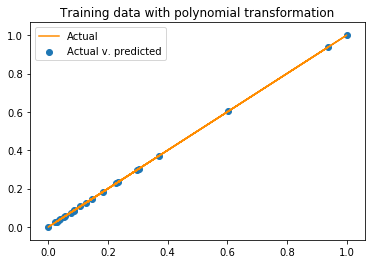

In [36]:
plt.plot(y_train, y_train, label='Actual', color='darkorange')
plt.scatter(y_train, y_hat_train_poly, label='Actual v. predicted')
plt.legend()
plt.title('Training data with polynomial transformation')
plt.show();

Wow, we almost get a perfect fit!

## Calculate the bias and variance for the train set

In [37]:
# your code here
print('Training bias:', bias(y_train, y_hat_train_poly))
print('Training variance:', variance(y_hat_train_poly))
# Bias: -2.5421584029769207e-16 
# Variance: 0.07230707736656222

Training bias: 6.106226635438361e-16
Training variance: 0.07415451225618688


## Plot your overfitted model's test predictions against the actual data.

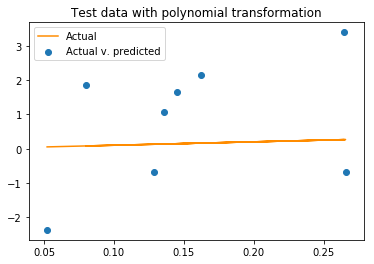

In [43]:
# your code here
x_test_poly = poly.fit_transform(x_test)
y_hat_test_poly = linreg2.predict(x_test_poly)

plt.plot(y_test, y_test, label='Actual', color='darkorange')
plt.scatter(y_test, y_hat_test_poly, label='Actual v. predicted')
plt.legend()
plt.title('Test data with polynomial transformation')
plt.show();

##  Calculate the bias and variance for the test set.

In [44]:
# your code here
print('Test bias:', bias(y_test, y_hat_test_poly))
print('Test variance:', variance(y_hat_test_poly))
# Bias: -0.16998568902304564 
# Variance: 0.3596092440273582

Test bias: 0.649510453574282
Test variance: 3.113426201494174


## Describe what you notice about the bias and variance statistics for your overfit model

Bias and variance are both very low for the training set (because it is overfit), and they are very high for the test set, which is very underfit.

## Level Up - Optional

In this lab we went from 4 predictors to 35 by adding polynomials and interactions, using `PolynomialFeatures`. That being said, where 35 leads to overfitting, there are probably ways to improve by just adding a few polynomials. Feel free to experiment and see how bias and variance improve!

In [48]:
poly = PolynomialFeatures(2)
x_train_poly2 = poly.fit_transform(x_train)
print('Shape:', np.shape(x_train_poly2))

linreg3 = LinearRegression().fit(x_train_poly2,y_train)
linreg3.coef_

y_hat_train_poly2 = linreg3.predict(x_train_poly2)

print('Training bias:', bias(y_train, y_hat_train_poly2))
print('Training variance:', variance(y_hat_train_poly2))

Shape: (22, 15)
Training bias: -7.771561172376096e-16
Training variance: 0.05633897305770624


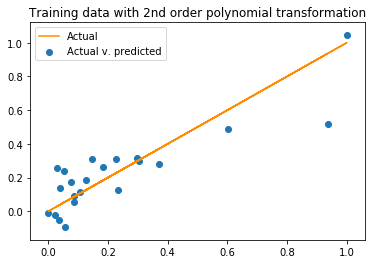

In [55]:
plt.plot(y_train, y_train, label='Actual', color='darkorange')
plt.scatter(y_train, y_hat_train_poly2, label='Actual v. predicted')
plt.legend()
plt.title('Training data with 2nd order polynomial transformation')
plt.show();

In [52]:
x_test_poly2 = poly.fit_transform(x_test)
y_hat_test_poly2 = linreg3.predict(x_test_poly2)

print('Test bias:', bias(y_test, y_hat_test_poly2))
print('Test variance:', variance(y_hat_test_poly2))

Test bias: -0.04282391379463994
Test variance: 0.08430535878145139


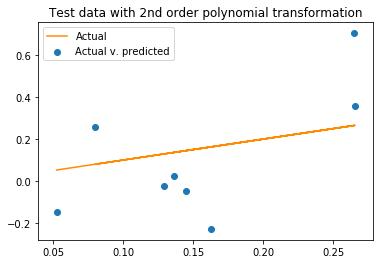

In [56]:
plt.plot(y_test, y_test, label='Actual', color='darkorange')
plt.scatter(y_test, y_hat_test_poly2, label='Actual v. predicted')
plt.legend()
plt.title('Test data with 2nd order polynomial transformation')
plt.show();

## Summary

This lab gave you insight into how bias and variance change for a training and a test set by using a pretty "simple" model, and a very complex model. 